## RETAIL SALES PREDICTIONS

## IMPORT LIBRARIES

In [3]:
import numpy as np     #Used for linear algebra
import pandas as pd    #used to make dataframe and data manipulation
import seaborn as sns  #used for data visualization
import matplotlib.pyplot as plt    #used for colurful plotting
%matplotlib inline                 
import warnings                    #Handling warnings
warnings.filterwarnings('ignore')

## READ CSV FILE

In [5]:
sales=pd.read_csv('retailsales.csv')  #importing dataset directly

In [6]:
sales  #Showing dataset

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


## PROBLEM STATEMENT

## DATA CLEANING

In [9]:
sales.head()   #printing the starting five rows by default of  the dataset and give the required number of rows as arguments

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [10]:
sales.tail() #printing the ending five rows by default of  the dataset and give the number of rows as we want as per requirement.

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [11]:
sales.drop('Invoice ID',axis=1,inplace=True) #Drop the invoice id and saves into same column

In [12]:
df=sales

In [13]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [14]:
df.sample(3) # Shows Random rows by default it gives single row we can use with a number of rows and columns we want to represent.

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
103,A,Yangon,Normal,Male,Food and beverages,58.26,6,17.4780,367.0380,3/28/2019,16:44,Cash,349.56,4.761905,17.4780,9.9
113,A,Yangon,Member,Male,Home and lifestyle,58.07,9,26.1315,548.7615,1/19/2019,20:07,Ewallet,522.63,4.761905,26.1315,4.3
835,A,Yangon,Normal,Male,Fashion accessories,52.38,1,2.6190,54.9990,3/26/2019,19:44,Cash,52.38,4.761905,2.6190,5.8


In [15]:
df.shape   # Finding number of rows and columns in the dataset

(1000, 16)

In [16]:
df.shape[0]  #Shows the total number of rows only in a dataset.

1000

In [17]:
df.shape[1]  #Show the total number of columns only in a dataset

16

In [18]:
df.columns.tolist()      #Represents the name of total columns as a list 

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [19]:
df.dtypes       #Shows the datatypes such as int,float ,object 

Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [20]:
# Replace 'date_column' and 'time_column' with your actual column names
df = df.drop(columns=['Date', 'Time'])
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,40.35,4.761905,2.0175,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,973.80,4.761905,48.6900,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,31.84,4.761905,1.5920,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,65.82,4.761905,3.2910,4.1


In [21]:
df.info() #gives short summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Branch                   1000 non-null   object 
 1   City                     1000 non-null   object 
 2   Customer type            1000 non-null   object 
 3   Gender                   1000 non-null   object 
 4   Product line             1000 non-null   object 
 5   Unit price               1000 non-null   float64
 6   Quantity                 1000 non-null   int64  
 7   Tax 5%                   1000 non-null   float64
 8   Total                    1000 non-null   float64
 9   Payment                  1000 non-null   object 
 10  cogs                     1000 non-null   float64
 11  gross margin percentage  1000 non-null   float64
 12  gross income             1000 non-null   float64
 13  Rating                   1000 non-null   float64
dtypes: float64(7), int64(1), 

In [22]:
df.isnull().sum()  #Giving the null values  (if no values)

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

<Axes: >

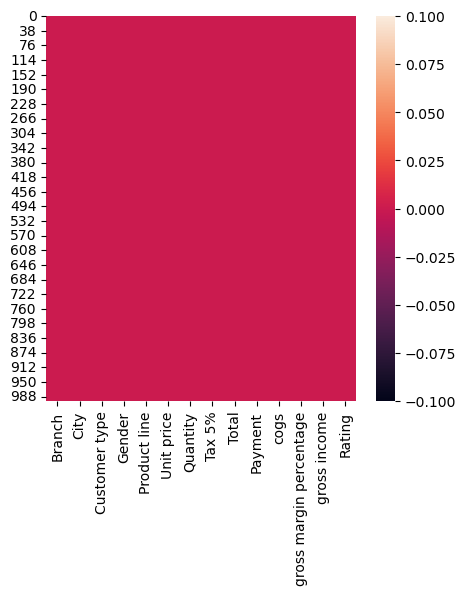

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())

In [24]:
# DATA CLEANING DONE

## DATA COLLECTION

In [26]:
# Separating the numericals and categorical analysis in the dataset

In [27]:
numerical_columns=df.select_dtypes(include='number')   #Numerical Columns
numerical_columns   

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [28]:
numerical_columns=df.select_dtypes(include='number')   #Numerical Columns
numerical_columns   

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


In [29]:
# There are 8 numerical columns in a dataset.

In [30]:
# Select categorical columns
categorical_columns = df.select_dtypes(exclude='number')
categorical_columns

,Branch,City,Customer type,Gender,Product line,Payment
0,A,Yangon,Member,Female,Health and beauty,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,A,Yangon,Member,Male,Health and beauty,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,Ewallet
...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,Ewallet
996,B,Mandalay,Normal,Female,Home and lifestyle,Ewallet
997,A,Yangon,Member,Male,Food and beverages,Cash
998,A,Yangon,Normal,Male,Home and lifestyle,Cash


In [31]:
#There are 6 categorical columns

## EXPLORATORY DATA ANALYSIS(EDA)

## UNIVARIATE ANALYSIS (Numerical columns)

In [34]:
numerical_columns

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
0,74.69,7,26.1415,548.9715,522.83,4.761905,26.1415,9.1
1,15.28,5,3.8200,80.2200,76.40,4.761905,3.8200,9.6
2,46.33,7,16.2155,340.5255,324.31,4.761905,16.2155,7.4
3,58.22,8,23.2880,489.0480,465.76,4.761905,23.2880,8.4
4,86.31,7,30.2085,634.3785,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...
995,40.35,1,2.0175,42.3675,40.35,4.761905,2.0175,6.2
996,97.38,10,48.6900,1022.4900,973.80,4.761905,48.6900,4.4
997,31.84,1,1.5920,33.4320,31.84,4.761905,1.5920,7.7
998,65.82,1,3.2910,69.1110,65.82,4.761905,3.2910,4.1


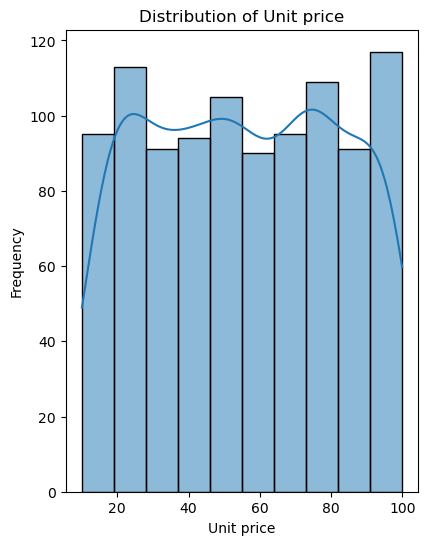

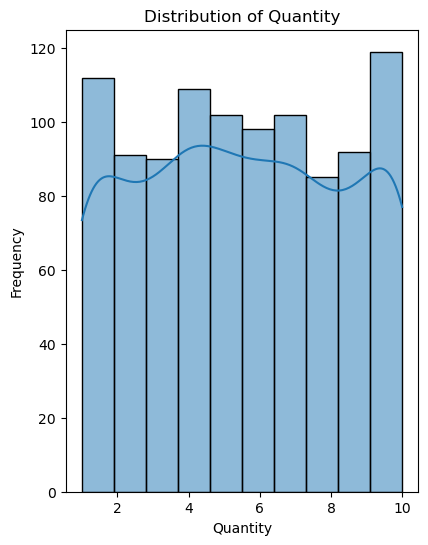

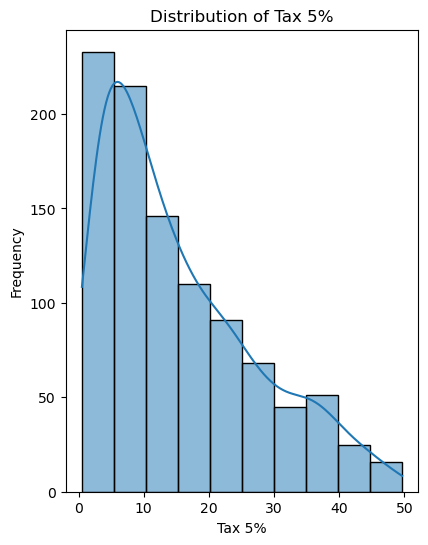

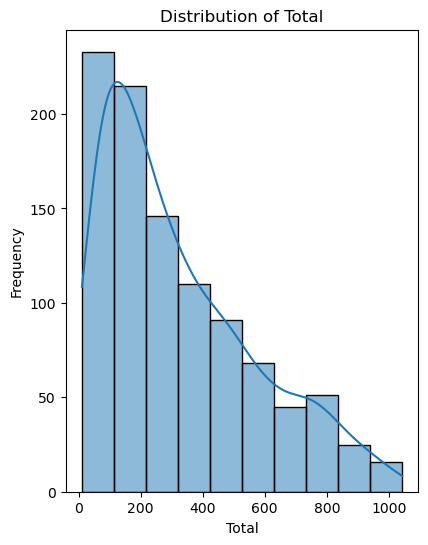

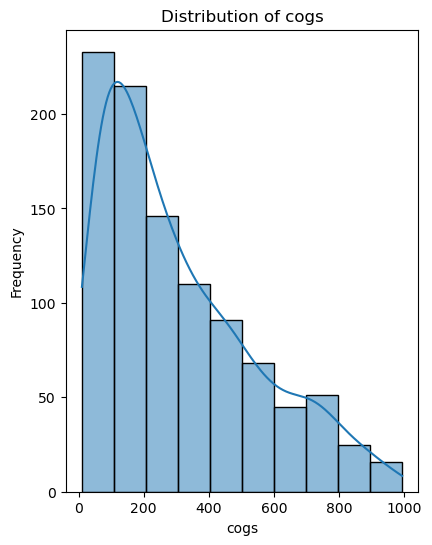

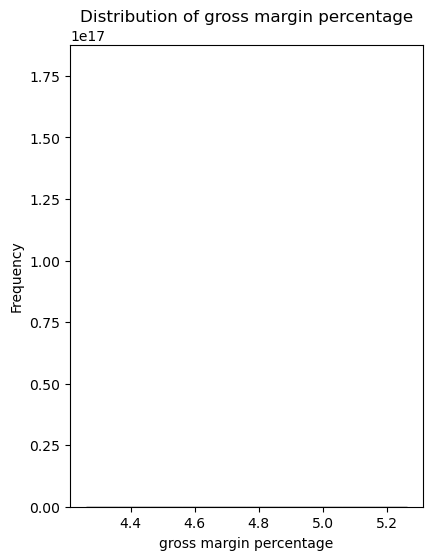

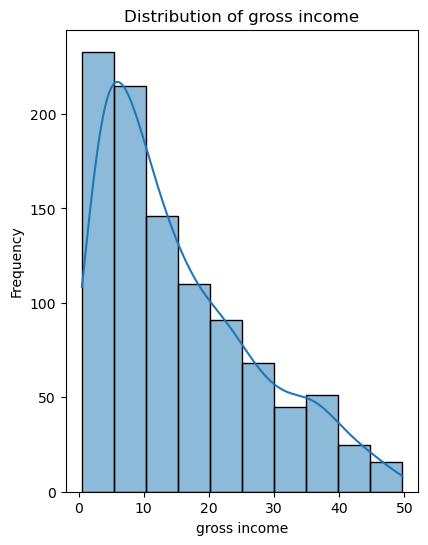

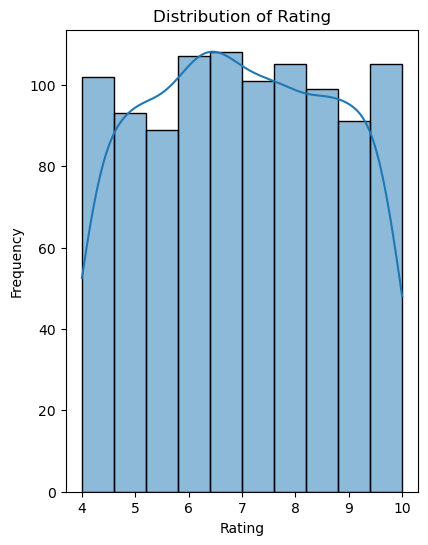

In [35]:
# Univariate analysis for each numerical column
for column in numerical_columns.columns:
    plt.figure(figsize=(10, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(numerical_columns[column], bins=10, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

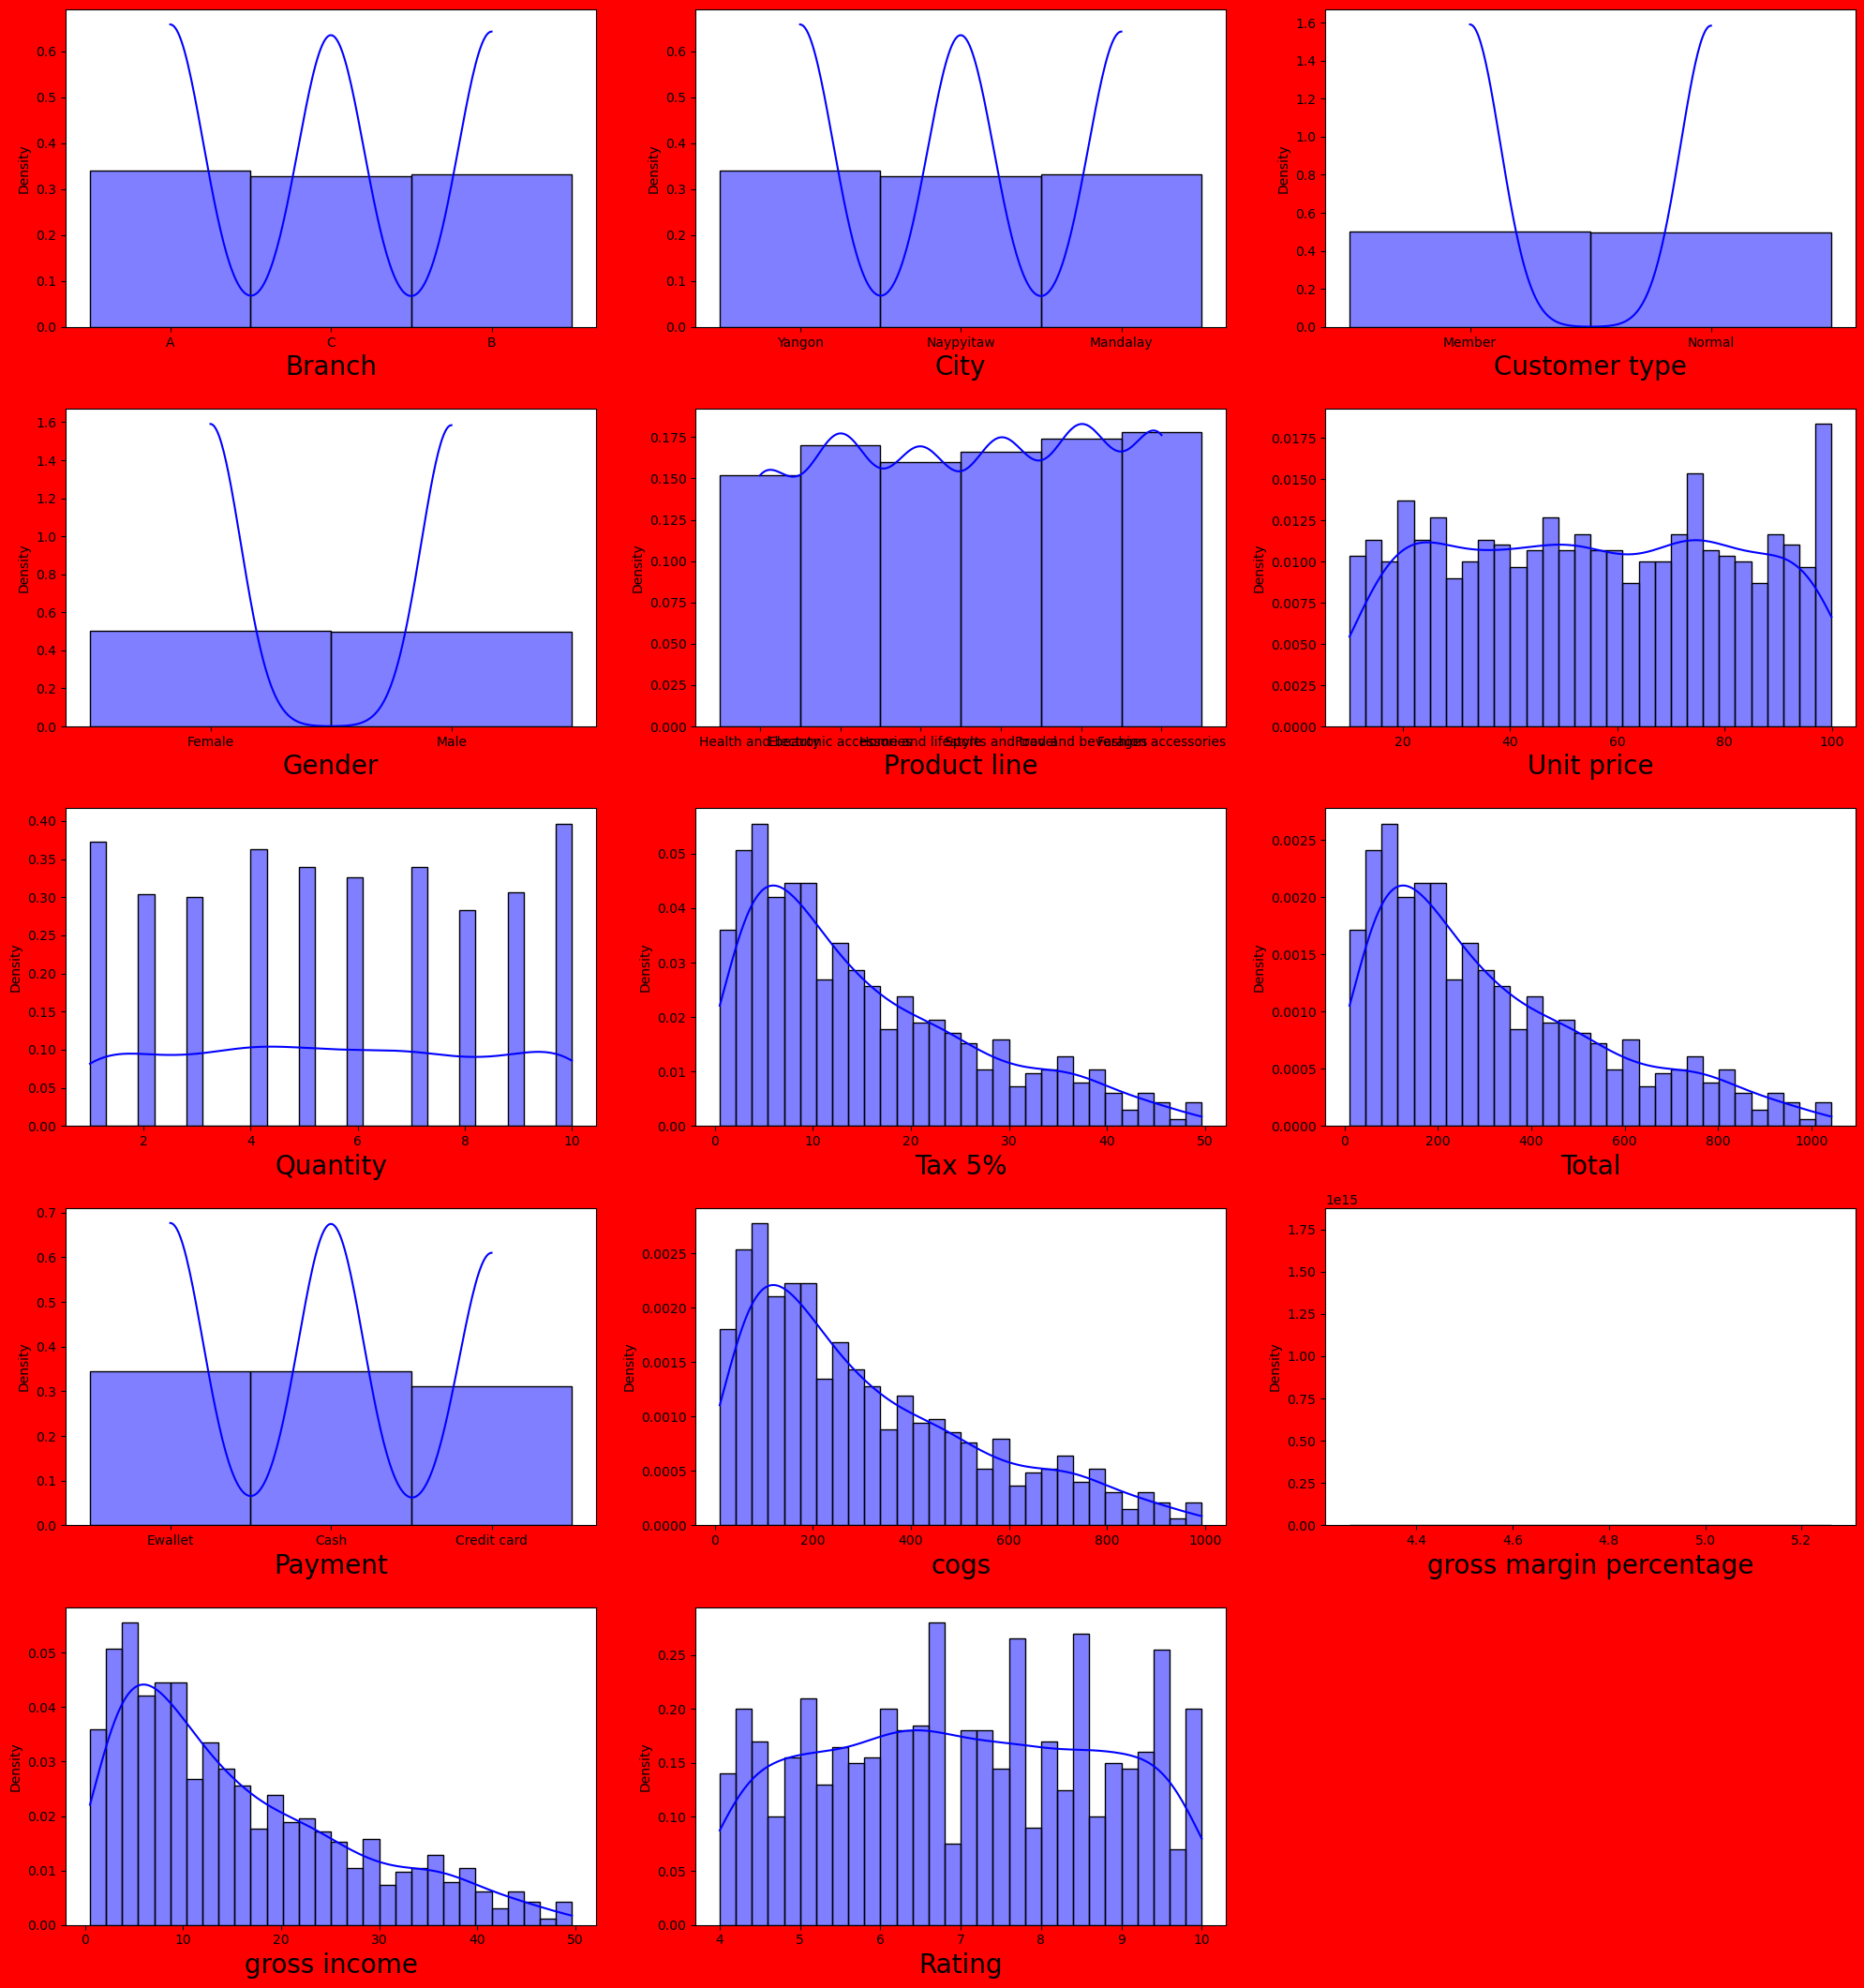

In [36]:
plt.figure(figsize=(20, 25), facecolor='Red')

# Initialize plot number
plotnumber = 1
# Loop through each column in the DataFrame
for column in df.columns:
    if plotnumber <= 17: 
        ax = plt.subplot(6, 3, plotnumber)  # Create a subplot grid (6 rows, 3 columns)
        sns.histplot(df[column], color='b', kde=True, stat="density", bins=30)  # Use histplot instead of distplot
        plt.xlabel(column, fontsize=20)  # Set x-label for each subplot
    plotnumber += 1  # Increment plot number

# Show all plots
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## BIVARIATE ANALYSIS

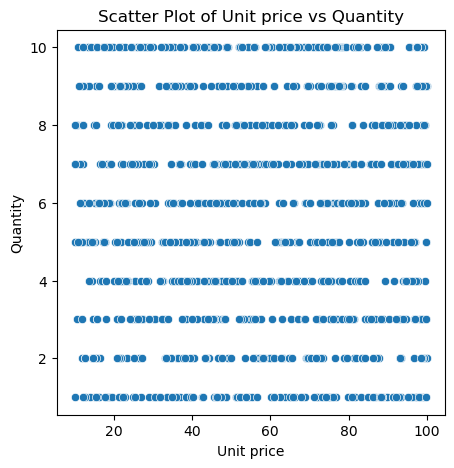

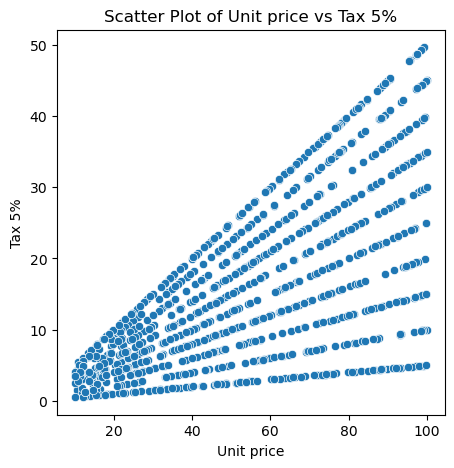

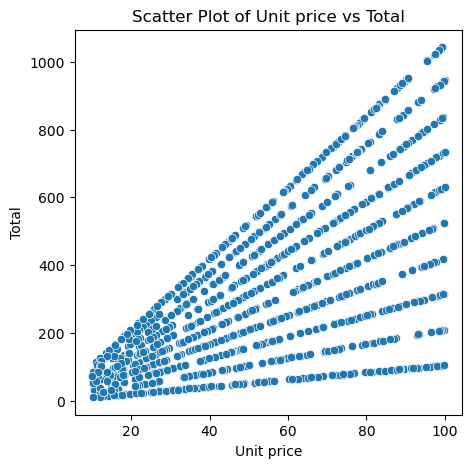

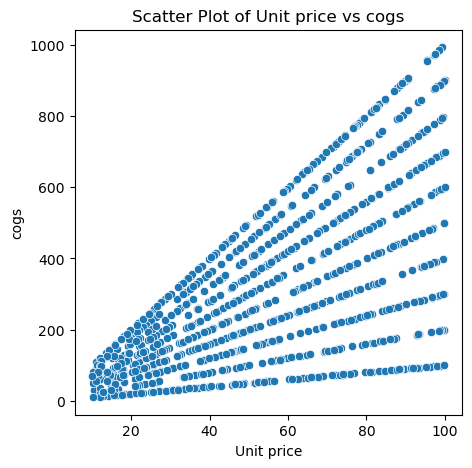

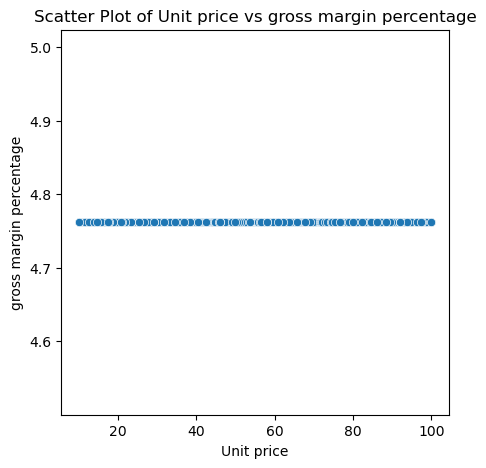

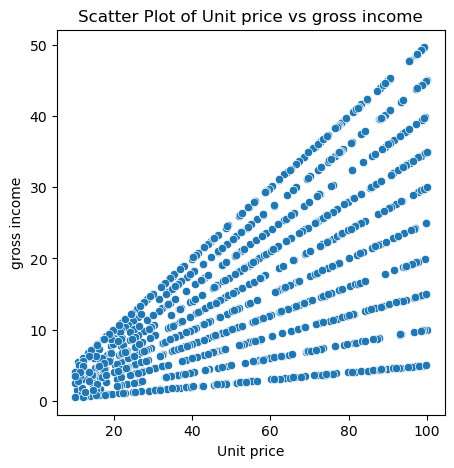

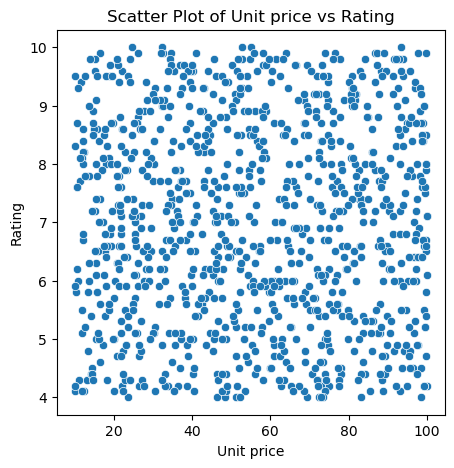

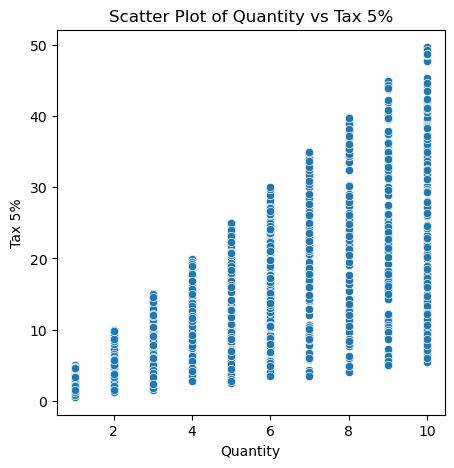

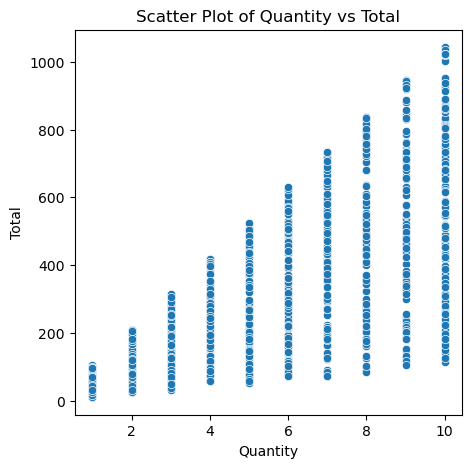

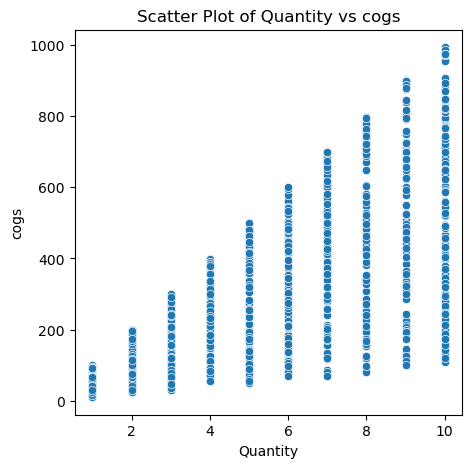

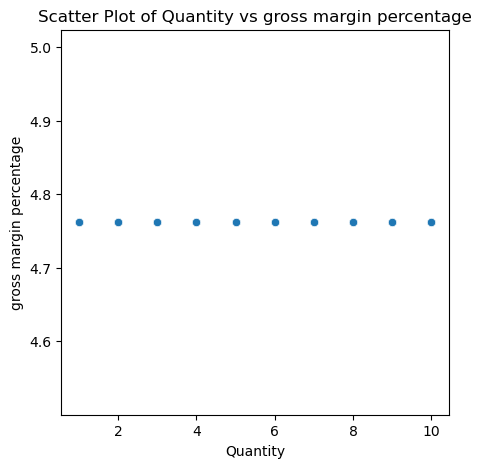

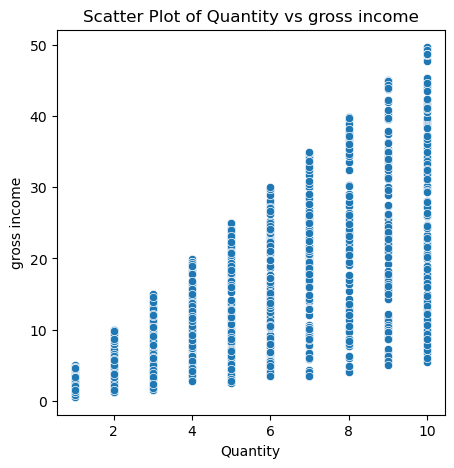

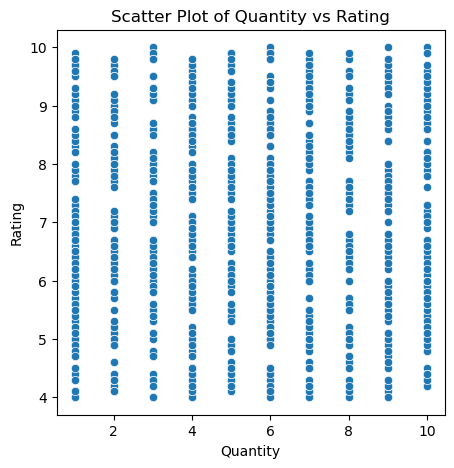

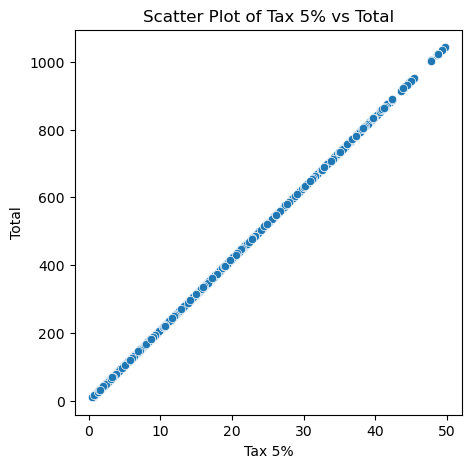

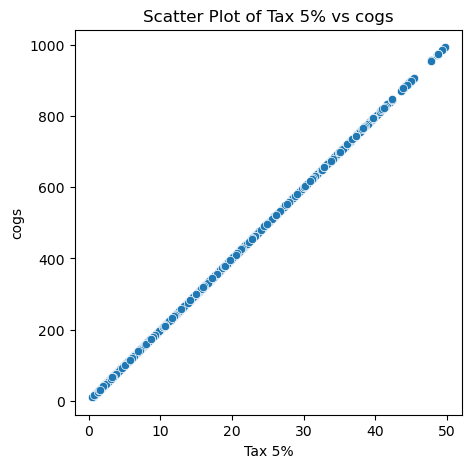

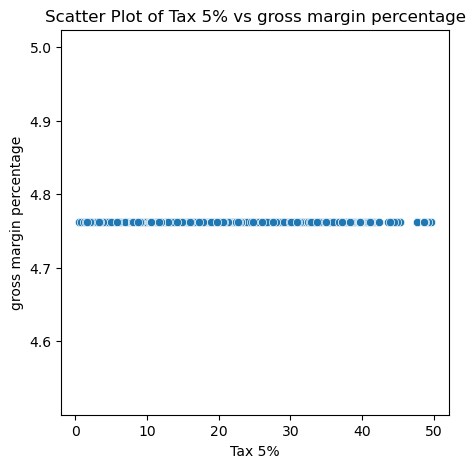

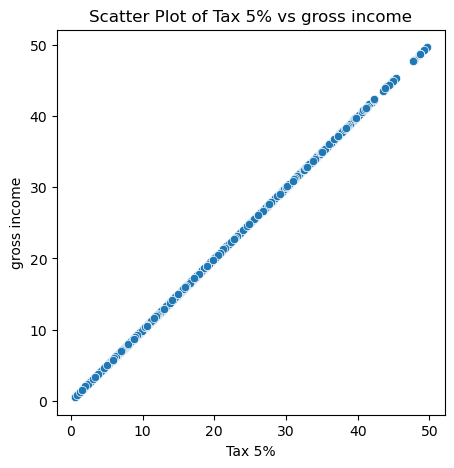

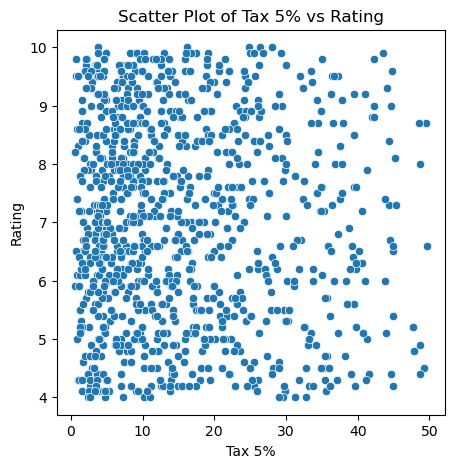

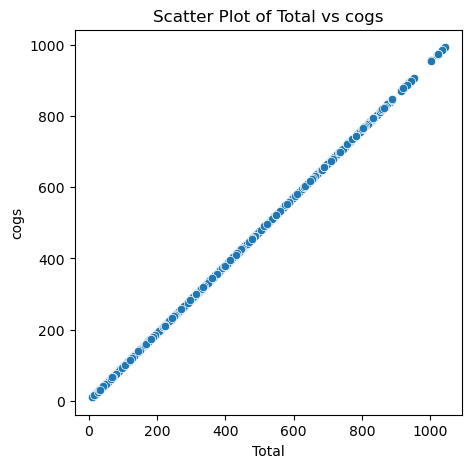

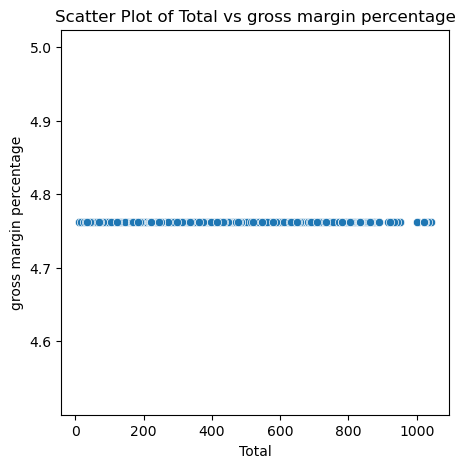

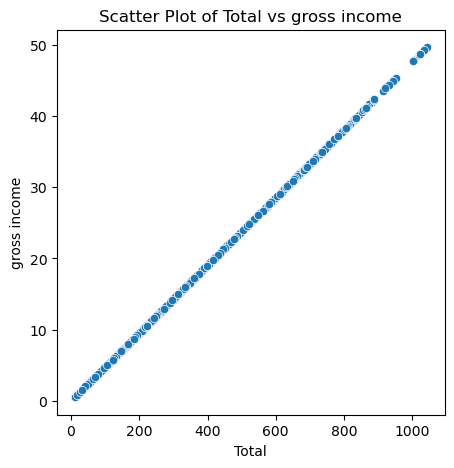

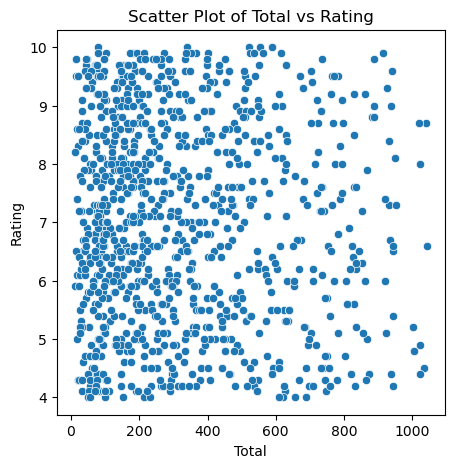

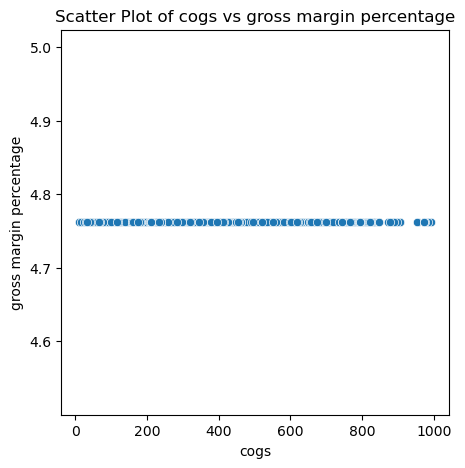

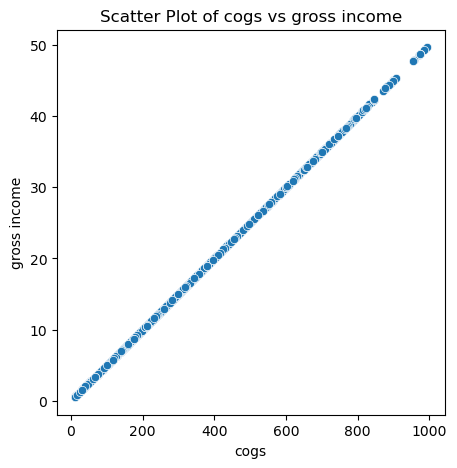

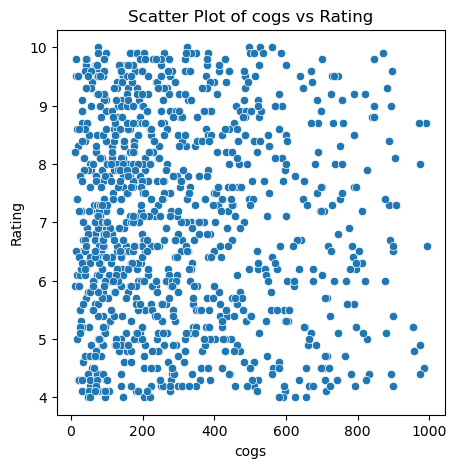

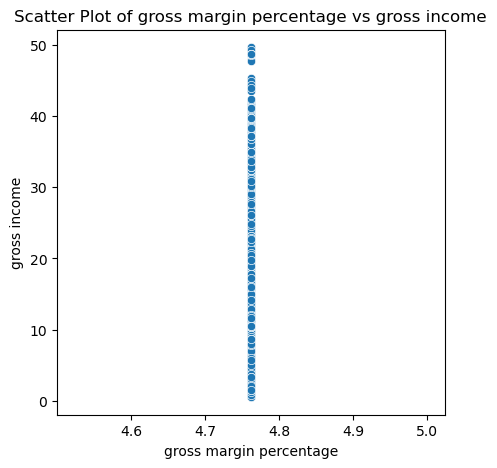

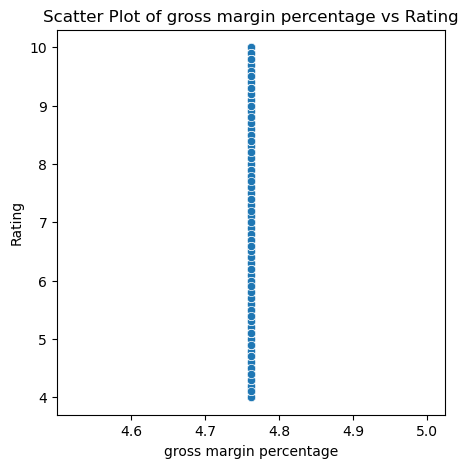

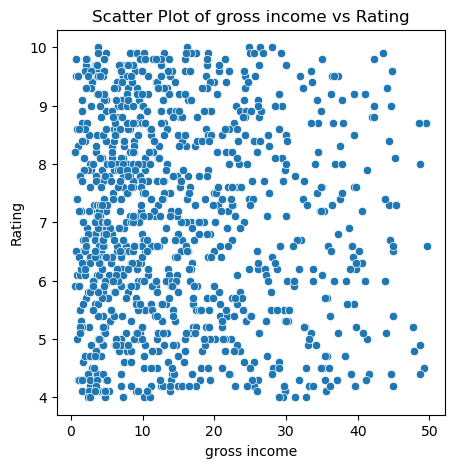

In [38]:
# Pairwise scatter plots and correlation analysis
for i in range(len(numerical_columns.columns)):
    for j in range(i + 1, len(numerical_columns.columns)):
        plt.figure(figsize=(5, 5))
        
        # Scatter plot
        sns.scatterplot(x=numerical_columns.iloc[:, i], y=numerical_columns.iloc[:, j])
        plt.title(f'Scatter Plot of {numerical_columns.columns[i]} vs {numerical_columns.columns[j]}')
        plt.xlabel(numerical_columns.columns[i])
        plt.ylabel(numerical_columns.columns[j])
        plt.show()

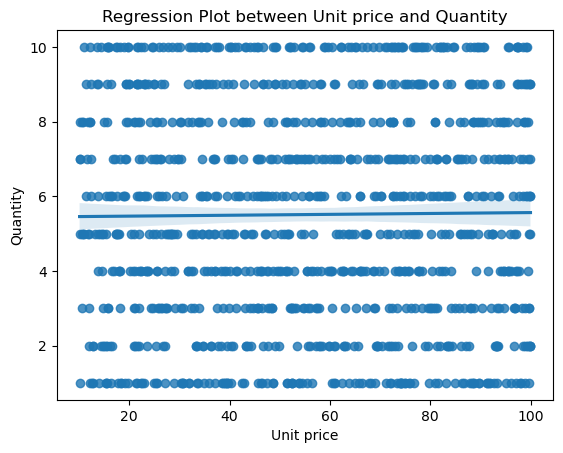

In [39]:
sns.regplot(x=numerical_columns['Unit price'], y=numerical_columns['Quantity'])
#regplot is designed to plot data points and fit a linear regression model.
plt.title('Regression Plot between Unit price and Quantity')
plt.xlabel('Unit price')
plt.ylabel('Quantity')
plt.show()

In [40]:
categorical_columns

,Branch,City,Customer type,Gender,Product line,Payment
0,A,Yangon,Member,Female,Health and beauty,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash
2,A,Yangon,Normal,Male,Home and lifestyle,Credit card
3,A,Yangon,Member,Male,Health and beauty,Ewallet
4,A,Yangon,Normal,Male,Sports and travel,Ewallet
...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,Ewallet
996,B,Mandalay,Normal,Female,Home and lifestyle,Ewallet
997,A,Yangon,Member,Male,Food and beverages,Cash
998,A,Yangon,Normal,Male,Home and lifestyle,Cash


## SWARM PLOT

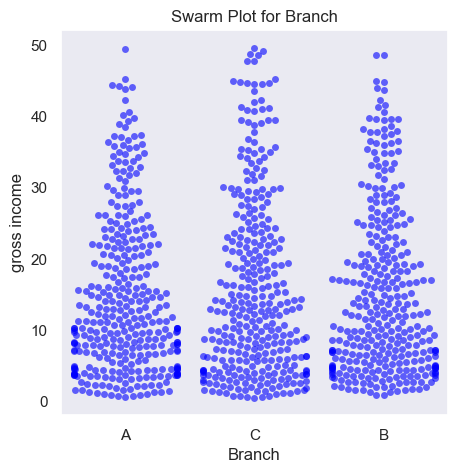

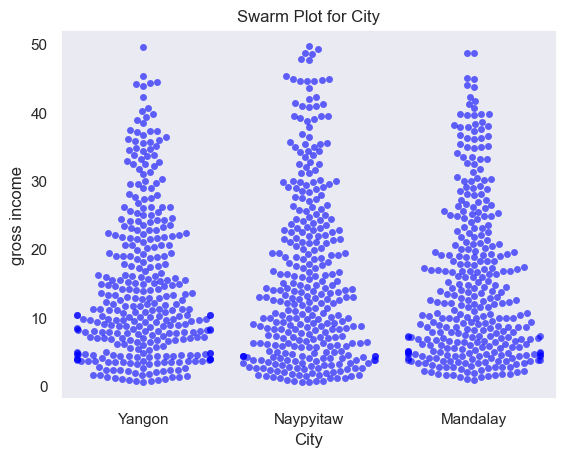

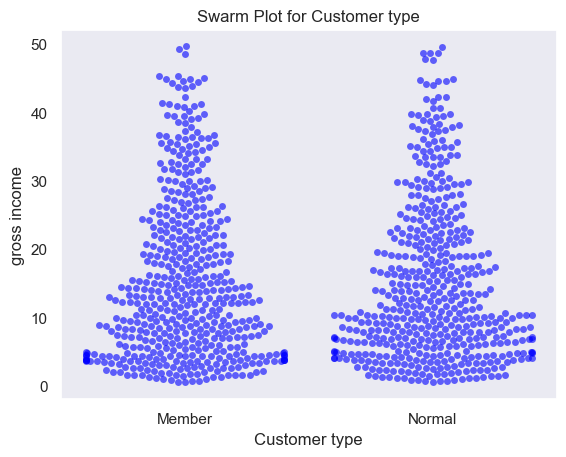

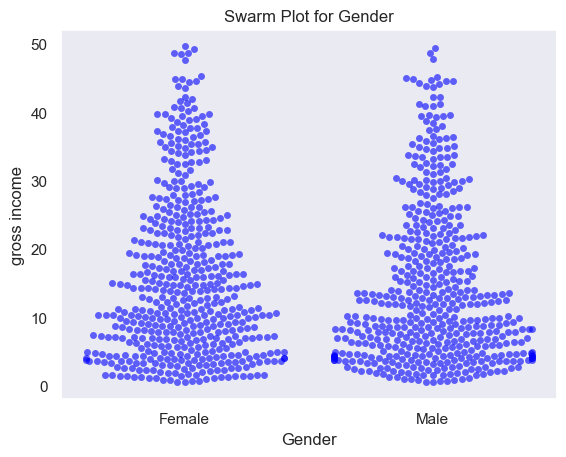

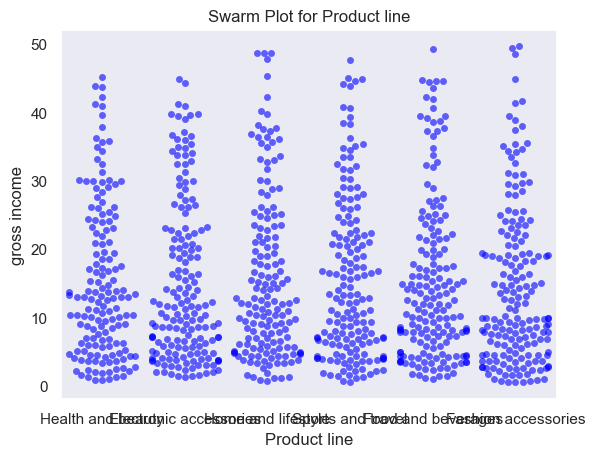

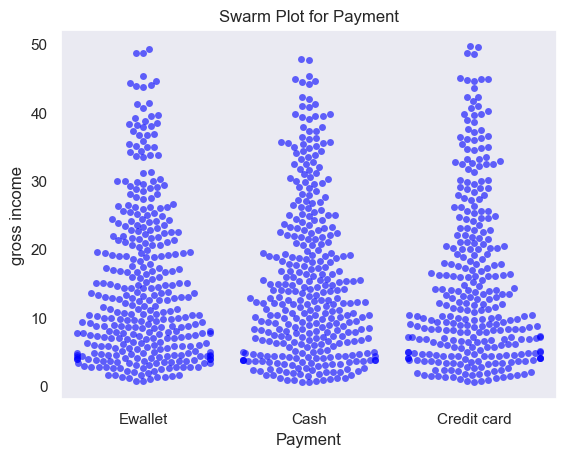

In [42]:
# Set the aesthetic style of the plots
sns.set(style="dark")

# Create a figure for plotting
plt.figure(figsize=(5, 5))

# Iterate through each categorical column
for i, cat_col in enumerate(categorical_columns.columns):
    # Create a swarm plot for each categorical column against a numerical variable
    # Replace 'numerical_variable' with your actual numerical column name
    sns.swarmplot(x=cat_col, y='gross income', data=df, color='blue', alpha=0.6)
    
    # Set title and labels
    plt.title(f'Swarm Plot for {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('gross income')
    
    # Show the plot for each category
    plt.show()

## VIOLIN PLOT

<Figure size 500x500 with 0 Axes>

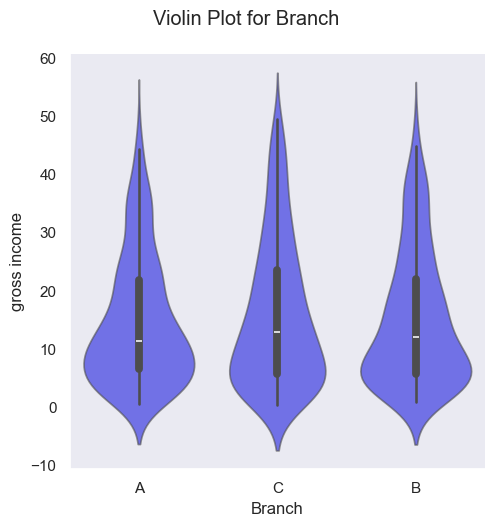

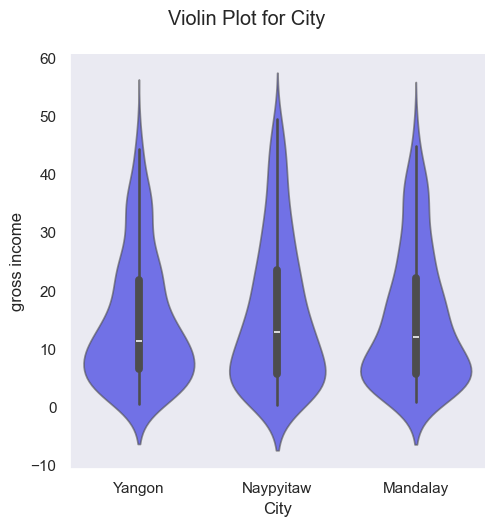

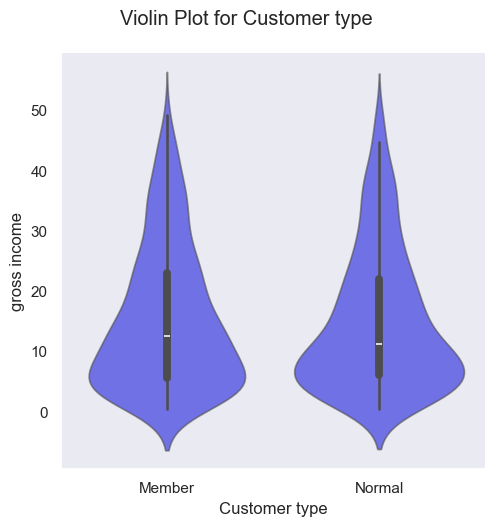

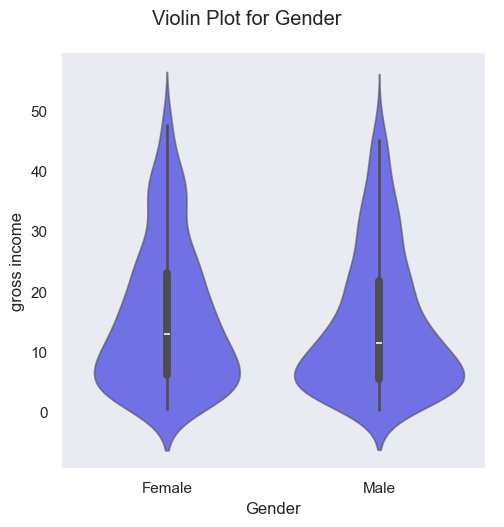

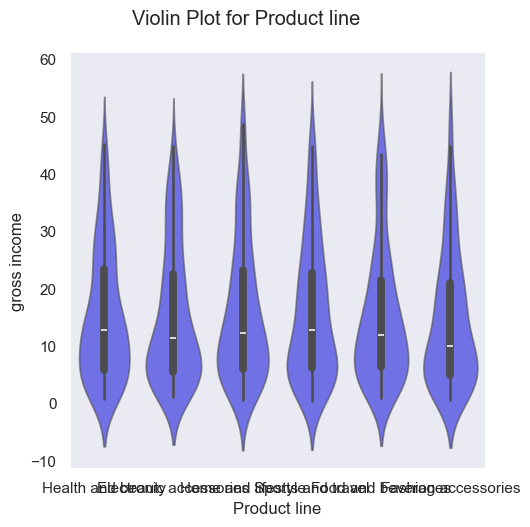

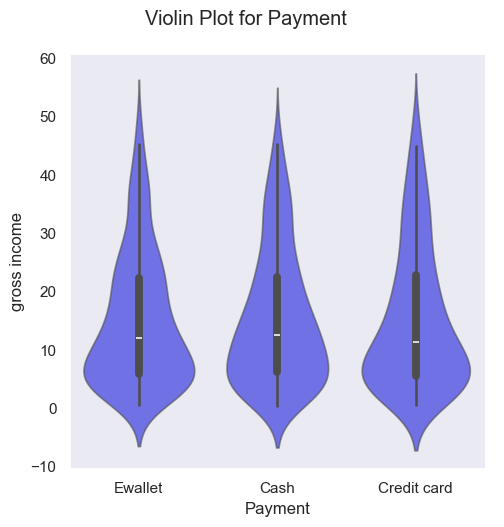

In [44]:
sns.set(style="dark")

# Create a figure for plotting
plt.figure(figsize=(5, 5))

# Iterate through each categorical column
for i, cat_col in enumerate(categorical_columns.columns):
    # Create a cat plot for each categorical column against a numerical variable
    # Replace 'numerical_variable' with your actual numerical column name
    g = sns.catplot(x=cat_col, y='gross income', data=df, kind='violin', color='blue', alpha=0.6)
    
    # Set title and labels
    g.fig.suptitle(f'Violin Plot for {cat_col}', y=1.05)  # Adjust title position
    g.set_axis_labels(cat_col, 'gross income')
    
    # Show the plot for each category
    plt.show()

## DATA VISUALIZATION

## HEATMAP

In [47]:
df1=numerical_columns

In [48]:
corr=df1.corr()
corr

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,1.000000,0.010778,0.633962,0.633962,0.633962,NaN,0.633962,-0.008778
Quantity,0.010778,1.000000,0.705510,0.705510,0.705510,NaN,0.705510,-0.015815
Tax 5%,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Total,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
cogs,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
gross margin percentage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gross income,0.633962,0.705510,1.000000,1.000000,1.000000,NaN,1.000000,-0.036442
Rating,-0.008778,-0.015815,-0.036442,-0.036442,-0.036442,NaN,-0.036442,1.000000


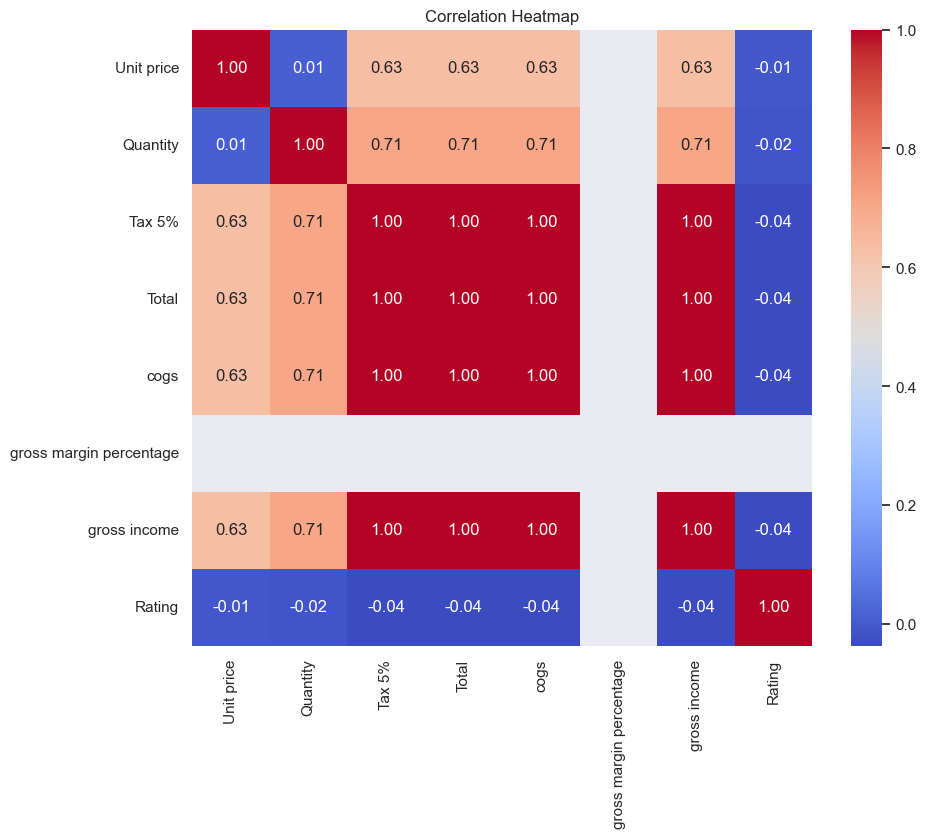

In [49]:
# Create heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')  # Customize as needed
plt.title('Correlation Heatmap')
plt.show()  # Display the heatmap

## BOX PLOT

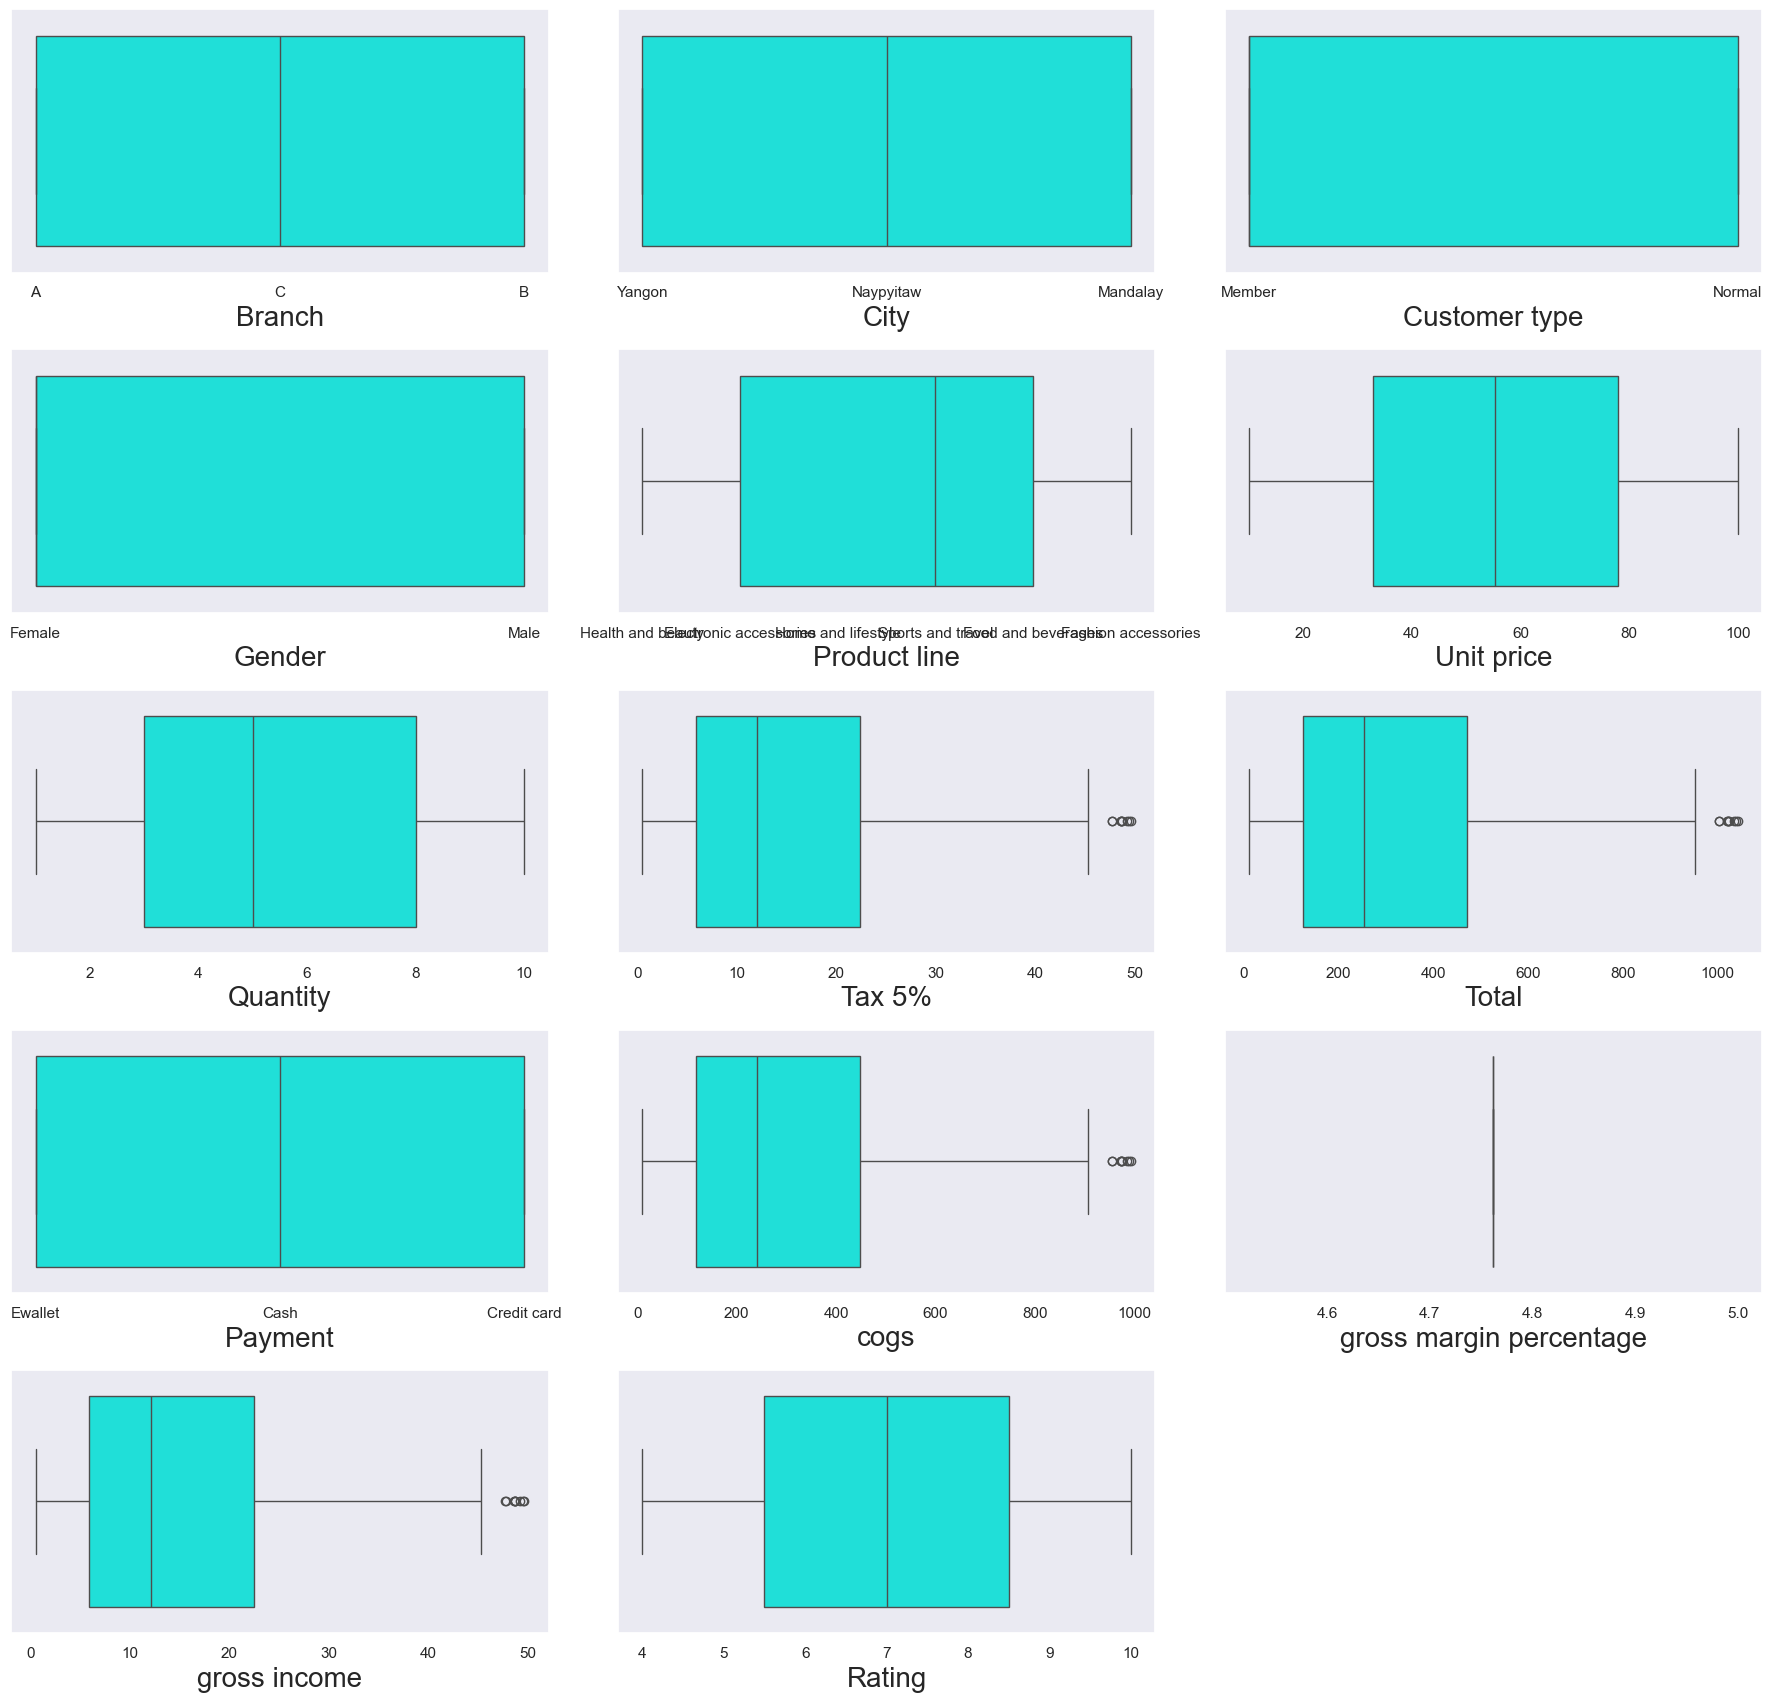

In [51]:
# Set up the figure with a specified size and background color
plt.figure(figsize=(18, 20), facecolor='white')

# Initialize plot number
plotnumber = 1

# Loop through each column in the DataFrame
for column in df.columns:
    if plotnumber <= 18:  
        ax = plt.subplot(6, 3, plotnumber) 
        sns.boxplot(x=df[column], palette='hsv')  
        plt.xlabel(column, fontsize=20)  # Set x-label for each subplot
    plotnumber += 1  # Increment plot number

# Adjust layout to prevent overlap
plt.tight_layout()

# Show all plots
plt.show()

In [52]:
#In box plot we have found outliers in some of the graph and some of them have no outliers
#In box plot we have found outliers are present in lower side in some graphs and no outliers are found in upper side graphs.
#Tax 5%	,cogs,Total	, gross income in this graph we have found ouliers are present at the lower side of the graph.
#For removing the outliers we can use IQR method to remove the outliers

## REMOVE OUTLIERS IN DATASET

In [54]:
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                         np.where(df[col] > upper_bound, upper_bound, df[col]))

In [55]:
#For removing the outliers we can first calculate the Q1 and Q3 then we can calculate IQR.
#After calculating IQR then we can use the formula of lower_bound to remove the ouliers.
#After this we can again plot the box plot.

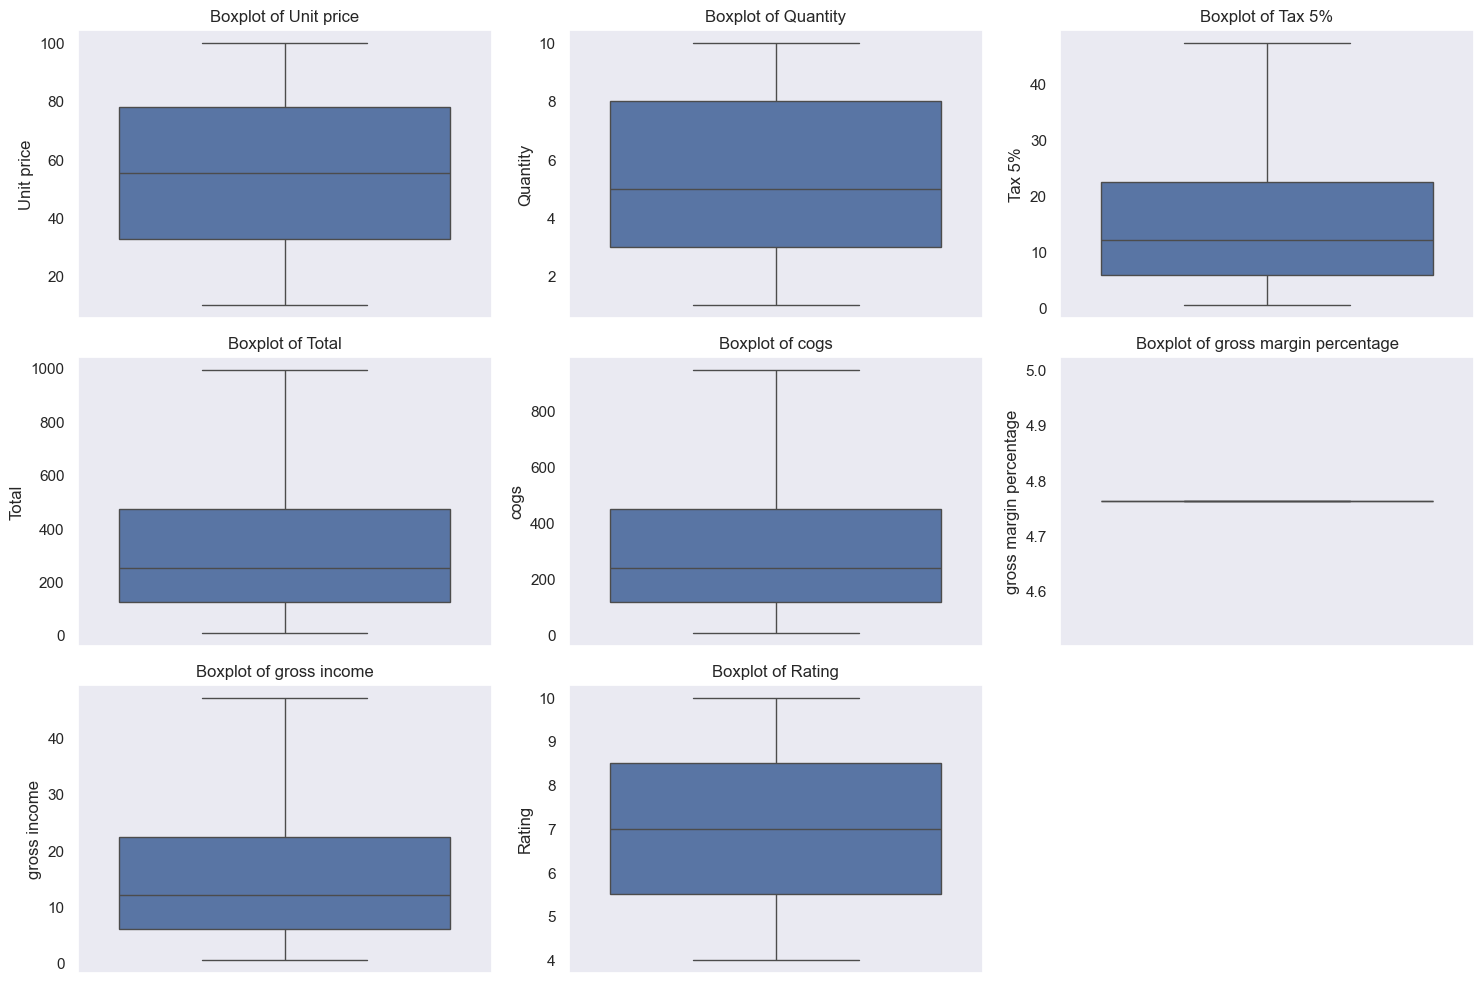

In [56]:
counter = 1
plt.figure(figsize=(15, 10))

for col in numerical_columns:
    plt.subplot(3, 3, counter)  
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    counter += 1  

plt.tight_layout()
plt.show()

In [57]:
# Visualization Done

## DESCRIPTIVE ANALYSIS

In [59]:
df1.mean()   #Returns the mean value

Unit price                  55.672130
Quantity                     5.510000
Tax 5%                      15.379369
Total                      322.966749
cogs                       307.587380
gross margin percentage      4.761905
gross income                15.379369
Rating                       6.972700
dtype: float64

In [60]:
df1.median()  #Returns the mid value

Unit price                  55.230000
Quantity                     5.000000
Tax 5%                      12.088000
Total                      253.848000
cogs                       241.760000
gross margin percentage      4.761905
gross income                12.088000
Rating                       7.000000
dtype: float64

In [61]:
df2=df1.mode()   #Returns the highest value.

In [62]:
df2.isnull().sum()

Unit price                 9
Quantity                   9
Tax 5%                     0
Total                      0
cogs                       0
gross margin percentage    9
gross income               0
Rating                     9
dtype: int64

In [63]:

# Fill NaN values with mode for each column
for column in df2.columns:
    mode_value = df2[column].mode()
    if not mode_value.empty:  # Check if mode is not empty
        df2[column].fillna(mode_value[0], inplace=True)  # Fill NaNs with the first mode value

# Display updated DataFrame
print("\nUpdated DataFrame after filling NaNs with mode:")
print(df2)


Updated DataFrame after filling NaNs with mode:
   Unit price  Quantity   Tax 5%     Total    cogs  gross margin percentage  \
0       83.77      10.0   4.1540   87.2340   83.08                 4.761905   
1       83.77      10.0   4.4640   93.7440   89.28                 4.761905   
2       83.77      10.0   8.3770  175.9170  167.54                 4.761905   
3       83.77      10.0   9.0045  189.0945  180.09                 4.761905   
4       83.77      10.0  10.3260  216.8460  206.52                 4.761905   
5       83.77      10.0  10.3635  217.6335  207.27                 4.761905   
6       83.77      10.0  12.5700  263.9700  251.40                 4.761905   
7       83.77      10.0  13.1880  276.9480  263.76                 4.761905   
8       83.77      10.0  22.4280  470.9880  448.56                 4.761905   
9       83.77      10.0  39.4800  829.0800  789.60                 4.761905   

   gross income  Rating  
0        4.1540     6.0  
1        4.4640     6.0  
2  

In [64]:
df2.isnull().sum()

Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [65]:
df1.std()   #Returns the standard deviation

Unit price                 2.649463e+01
Quantity                   2.923431e+00
Tax 5%                     1.170883e+01
Total                      2.458853e+02
cogs                       2.341765e+02
gross margin percentage    6.131498e-14
gross income               1.170883e+01
Rating                     1.718580e+00
dtype: float64

In [66]:
df1.var()   #Returns the variance

Unit price                 7.019653e+02
Quantity                   8.546446e+00
Tax 5%                     1.370966e+02
Total                      6.045960e+04
cogs                       5.483864e+04
gross margin percentage    3.759526e-27
gross income               1.370966e+02
Rating                     2.953518e+00
dtype: float64

In [67]:
df1.skew()   #Returns the skewness

Unit price                 0.007077
Quantity                   0.012941
Tax 5%                     0.892570
Total                      0.892570
cogs                       0.892570
gross margin percentage    0.000000
gross income               0.892570
Rating                     0.009010
dtype: float64

In [68]:
df1.max()    #Returns the maximum value

Unit price                   99.960000
Quantity                     10.000000
Tax 5%                       49.650000
Total                      1042.650000
cogs                        993.000000
gross margin percentage       4.761905
gross income                 49.650000
Rating                       10.000000
dtype: float64

In [69]:
df1.min()  #Returns the minimum value

Unit price                 10.080000
Quantity                    1.000000
Tax 5%                      0.508500
Total                      10.678500
cogs                       10.170000
gross margin percentage     4.761905
gross income                0.508500
Rating                      4.000000
dtype: float64

In [70]:
Q1=df1.quantile(0.25)   #Return the 25% of the data

In [71]:
Q1

Unit price                  32.875000
Quantity                     3.000000
Tax 5%                       5.924875
Total                      124.422375
cogs                       118.497500
gross margin percentage      4.761905
gross income                 5.924875
Rating                       5.500000
Name: 0.25, dtype: float64

In [72]:
Q2=df1.quantile(0.50)   #Returns the 50% of the data.
Q2

Unit price                  55.230000
Quantity                     5.000000
Tax 5%                      12.088000
Total                      253.848000
cogs                       241.760000
gross margin percentage      4.761905
gross income                12.088000
Rating                       7.000000
Name: 0.5, dtype: float64

In [73]:
Q3=df1.quantile(0.75)  #Returns the 75% of the data
Q3

Unit price                  77.935000
Quantity                     8.000000
Tax 5%                      22.445250
Total                      471.350250
cogs                       448.905000
gross margin percentage      4.761905
gross income                22.445250
Rating                       8.500000
Name: 0.75, dtype: float64

In [74]:
IQR=Q3-Q1

In [75]:
IQR      #Returns the difference between the 75% and 25%

Unit price                  45.060000
Quantity                     5.000000
Tax 5%                      16.520375
Total                      346.927875
cogs                       330.407500
gross margin percentage      0.000000
gross income                16.520375
Rating                       3.000000
dtype: float64

In [76]:
df1.cov()    #Returns the covariance

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Unit price,701.965331,0.834778,196.668340,4130.035142,3933.366802,0.0,196.668340,-0.399668
Quantity,0.834778,8.546446,24.149570,507.140978,482.991408,0.0,24.149570,-0.079456
Tax 5%,196.668340,24.149570,137.096594,2879.028477,2741.931883,0.0,137.096594,-0.733300
Total,4130.035142,507.140978,2879.028477,60459.598018,57580.569541,0.0,2879.028477,-15.399306
cogs,3933.366802,482.991408,2741.931883,57580.569541,54838.637658,0.0,2741.931883,-14.666006
gross margin percentage,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
gross income,196.668340,24.149570,137.096594,2879.028477,2741.931883,0.0,137.096594,-0.733300
Rating,-0.399668,-0.079456,-0.733300,-15.399306,-14.666006,0.0,-0.733300,2.953518


## ENCODING

In [78]:
!pip install category_encoders

In [79]:
import category_encoders as ce

In [80]:
categorical_columns = ['Branch', 'City', 'Customer type','Gender','Payment','Product line']

# Step 4: Initialize the Binary Encoder for multiple columns
encoder = ce.BinaryEncoder(cols=categorical_columns)

# Step 5: Fit and transform the data
df_encoded = encoder.fit_transform(df)
df_encoded

,Branch_0,Branch_1,City_0,City_1,Customer type_0,Customer type_1,Gender_0,Gender_1,Product line_0,Product line_1,...,Unit price,Quantity,Tax 5%,Total,Payment_0,Payment_1,cogs,gross margin percentage,gross income,Rating
0,0,1,0,1,0,1,0,1,0,0,...,74.69,7.0,26.141500,548.971500,0,1,522.83000,4.761905,26.141500,9.1
1,1,0,1,0,1,0,0,1,0,1,...,15.28,5.0,3.820000,80.220000,1,0,76.40000,4.761905,3.820000,9.6
2,0,1,0,1,1,0,1,0,0,1,...,46.33,7.0,16.215500,340.525500,1,1,324.31000,4.761905,16.215500,7.4
3,0,1,0,1,0,1,1,0,0,0,...,58.22,8.0,23.288000,489.048000,0,1,465.76000,4.761905,23.288000,8.4
4,0,1,0,1,1,0,1,0,1,0,...,86.31,7.0,30.208500,634.378500,0,1,604.17000,4.761905,30.208500,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,0,1,0,1,0,0,0,...,40.35,1.0,2.017500,42.367500,0,1,40.35000,4.761905,2.017500,6.2
996,1,1,1,1,1,0,0,1,0,1,...,97.38,10.0,47.225813,991.742062,0,1,944.51625,4.761905,47.225813,4.4
997,0,1,0,1,0,1,1,0,1,0,...,31.84,1.0,1.592000,33.432000,1,0,31.84000,4.761905,1.592000,7.7
998,0,1,0,1,1,0,1,0,0,1,...,65.82,1.0,3.291000,69.111000,1,0,65.82000,4.761905,3.291000,4.1


## SCALING

In [82]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
std_scaler=scaler.fit_transform(numerical_columns)
std_scaler

array([[ 0.71816014,  0.5099302 ,  0.91960685, ...,  0.        ,
         0.91960685,  1.23844341],
       [-1.52530319, -0.17453987, -0.98772956, ...,  0.        ,
        -0.98772956,  1.52952681],
       [-0.35278112,  0.5099302 ,  0.07144605, ...,  0.        ,
         0.07144605,  0.24875987],
       ...,
       [-0.89995809, -1.54348001, -1.17810859, ...,  0.        ,
        -1.17810859,  0.42340991],
       [ 0.38320778, -1.54348001, -1.03293176, ...,  0.        ,
        -1.03293176, -1.67239054],
       [ 1.23361671,  0.5099302 ,  1.32783657, ...,  0.        ,
         1.32783657, -0.21697356]])

In [83]:
std_scaler.shape

(1000, 8)

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
vif=pd.DataFrame()

In [86]:
vif['vif']=[variance_inflation_factor(std_scaler,i) for i in range(std_scaler.shape[1])]

In [87]:
vif['Features']=numerical_columns.columns

In [88]:
vif = vif.dropna()

In [89]:
vif

,vif,Features
0,4.582295,Unit price
1,5.455845,Quantity
2,inf,Tax 5%
3,inf,Total
4,inf,cogs
6,inf,gross income
7,1.003941,Rating


In [90]:
df

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.141500,548.971500,Ewallet,522.83000,4.761905,26.141500,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.820000,80.220000,Cash,76.40000,4.761905,3.820000,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.215500,340.525500,Credit card,324.31000,4.761905,16.215500,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.288000,489.048000,Ewallet,465.76000,4.761905,23.288000,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.208500,634.378500,Ewallet,604.17000,4.761905,30.208500,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1.0,2.017500,42.367500,Ewallet,40.35000,4.761905,2.017500,6.2
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10.0,47.225813,991.742062,Ewallet,944.51625,4.761905,47.225813,4.4
997,A,Yangon,Member,Male,Food and beverages,31.84,1.0,1.592000,33.432000,Cash,31.84000,4.761905,1.592000,7.7
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1.0,3.291000,69.111000,Cash,65.82000,4.761905,3.291000,4.1


## TRAIN TEST SPLIT

In [92]:
# splitting data into testing and training
from sklearn.model_selection import train_test_split

In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Defining features (X) and target (Y)
X = df[['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income']]  # Features should be a DataFrame
Y = df['Rating']  # Target variable

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2,shuffle=False)

In [94]:
print(X.shape,X_train.shape,X_test.shape)

(1000, 6) (800, 6) (200, 6)


## MODEL BUILDING

In [96]:
# model training
# simple Linear regression model
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [97]:
# creating object LinearRegression model
regressor=LinearRegression()

In [98]:
# fitting data X_train into y_train
regressor.fit(X_train ,Y_train) 

LinearRegression()

In [99]:
# Model evaluation
# prediction on training data

training_data_prediction=regressor.predict(X_train) 

In [100]:
# R squared value for training data ( lie in the range of 0 to 1  ) # if value is close to 0 (performance is well)
r2_train = metrics.r2_score(Y_train , training_data_prediction)
print("R squared value on training data:",r2_train) 

R squared value on training data: 0.0043913865832823085


In [101]:
# prediction on testing data
test_data_prediction=regressor.predict(X_test) 
print(test_data_prediction)

[7.07626029 7.15234809 6.98942419 7.0846703  6.92547079 7.02195048
 7.12470389 6.99458056 6.77636304 7.00544866 7.24146036 7.16710418
 7.00530455 7.1784214  7.06795488 7.04692531 7.05933522 7.13548778
 7.04072963 7.01228294 6.99725324 6.95189679 6.73698833 7.02245828
 7.01270663 6.96622596 6.94627493 6.95658886 6.98502047 6.91665611
 7.24233086 7.00697941 7.23642059 7.15842237 7.07433664 6.95625039
 7.01566047 7.03759467 7.05198362 7.06515421 6.9821874  6.99739124
 6.92071556 6.82728578 6.79490759 7.08266047 7.06471264 6.80041381
 6.94167171 6.9401795  7.06907607 7.14483307 7.03465137 7.07469799
 6.99316582 7.15909891 7.19394909 6.972556   7.01441676 7.09262131
 7.13229377 6.81927209 7.30992894 7.0414036  7.04858512 6.93865067
 6.87593972 7.00939788 6.91583772 7.00900905 7.1250102  6.97765194
 7.30597159 6.95813522 6.96751206 6.99171694 6.95609455 6.89064319
 6.87827634 7.23527519 7.21909649 7.24407187 7.22809374 7.05585443
 7.08733198 7.05888932 7.14076089 6.92218721 7.23486284 6.8967

In [102]:
# R squared value for testing data ( lie in the range of 0 to 1  ) # if value is close to 0 (performance is well)
from sklearn import metrics

# Assuming Y_test and test_data_prediction are already defined
r2_test = metrics.r2_score(Y_test, test_data_prediction)

# Print the absolute value of R squared
print("R squared value (absolute):", abs(r2_test))

R squared value (absolute): 0.017389999654041643


In [103]:
X

,Unit price,Quantity,Tax 5%,Total,cogs,gross income
0,74.69,7.0,26.141500,548.971500,522.83000,26.141500
1,15.28,5.0,3.820000,80.220000,76.40000,3.820000
2,46.33,7.0,16.215500,340.525500,324.31000,16.215500
3,58.22,8.0,23.288000,489.048000,465.76000,23.288000
4,86.31,7.0,30.208500,634.378500,604.17000,30.208500
...,...,...,...,...,...,...
995,40.35,1.0,2.017500,42.367500,40.35000,2.017500
996,97.38,10.0,47.225813,991.742062,944.51625,47.225813
997,31.84,1.0,1.592000,33.432000,31.84000,1.592000
998,65.82,1.0,3.291000,69.111000,65.82000,3.291000


In [104]:
Y

0      9.1
1      9.6
2      7.4
3      8.4
4      5.3
      ... 
995    6.2
996    4.4
997    7.7
998    4.1
999    6.6
Name: Rating, Length: 1000, dtype: float64

In [105]:
# building a predictive system
input_data=(60 ,0 ,24.3 ,1 ,0 ,72) 

# changing input_data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)

# reshape the array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=regressor.predict(input_data_reshaped)

In [106]:
print(prediction) 

[9.55966798]


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split

In [108]:
principle_x = df.drop(columns=['Rating'])  # Define features by dropping the target column

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=0.3)

# Print the sizes of the training and testing sets
print('Training feature matrix size:', X_train.shape)
print('Training target vector size:', Y_train.shape)
print('Test feature matrix size:', X_test.shape)
print('Test target vector size:', Y_test.shape)

Training feature matrix size: (700, 13)
Training target vector size: (700,)
Test feature matrix size: (300, 13)
Test target vector size: (300,)
